Ideas for Analysis 

* Historical look at women in political seats since 2010
* Is there a Region that has seen significant growth in women in politics?
* Is having more women in policy correlated with GDP?

In [64]:
%matplotlib inline

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

In [66]:
country_data = pd.read_csv('./world-development-indicators/Country.csv')
country_data.shape

(247, 31)

In [67]:
country_data['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [68]:
country_data['IncomeGroup'].value_counts()

Upper middle income     53
Lower middle income     51
High income: nonOECD    47
High income: OECD       32
Low income              31
Name: IncomeGroup, dtype: int64

In [69]:
indicator_data = pd.read_csv('./world-development-indicators/Indicators.csv')
indicator_data.shape

(5656458, 6)

### Merge indicator table with the country table

In [101]:
full_data = indicator_data.merge(country_data[['CountryCode', 'ShortName', 'Region', 'IncomeGroup']],
               on = 'CountryCode',
               how = 'inner')

del full_data["IndicatorCode"]
full_data.head(15)

,CountryName,CountryCode,IndicatorName,Year,Value,ShortName,Region,IncomeGroup
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",1960,1.335609e+02,Arab World,NaN,NaN
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,1960,8.779760e+01,Arab World,NaN,NaN
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",1960,6.634579e+00,Arab World,NaN,NaN
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",1960,8.102333e+01,Arab World,NaN,NaN
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),1960,3.000000e+06,Arab World,NaN,NaN
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),1960,5.380000e+08,Arab World,NaN,NaN
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",1960,4.769789e+01,Arab World,NaN,NaN
7,Arab World,ARB,CO2 emissions (kt),1960,5.956399e+04,Arab World,NaN,NaN
8,Arab World,ARB,CO2 emissions (metric tons per capita),1960,6.439635e-01,Arab World,NaN,NaN
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,1960,5.041292e+00,Arab World,NaN,NaN


### Create the data filters

In [79]:
# Filter the GDP per capita (constant 2005 USdollar)
filter_gdp = full_data['IndicatorName'].str.contains('GDP per capita \(constant 2005')

full_data[filter_gdp].describe()

,Year,Value
count,9951.000000,9951.000000
mean,1990.567883,9010.536603
std,15.125525,14684.507804
min,1960.000000,69.579193
25%,1979.000000,771.337823
50%,1992.000000,2615.493224
75%,2003.000000,11000.829721
max,2014.000000,158602.519246


In [80]:
# Filter the Proportion of seats held by women in national parliaments (%)
filter_pol = full_data['IndicatorName'].str.contains('Proportion of seats held by women')

full_data[filter_pol].describe()

,Year,Value
count,4120.000000,4120.000000
mean,2005.674757,15.625130
std,6.183371,10.152193
min,1990.000000,0.000000
25%,2001.000000,8.400000
50%,2006.000000,14.000000
75%,2011.000000,21.300000
max,2015.000000,63.800000


# Filter the Pregnant women receiving prenatal care (%)
filter_preg = full_data['IndicatorName'].str.contains('Pregnant women receiving prenatal care')

full_data[filter_preg].describe()

# Filter the Contraceptive prevalence (% of women ages 15-49)
filter_contr = full_data['IndicatorName'].str.contains('Contraceptive prevalence')

full_data[filter_contr].describe()

In [235]:
# Filter the Gross enrolment ratio, tertiary, female (%)
filter_educ = full_data['IndicatorName'].str.contains('tertiary\, female')

full_data[filter_educ].describe()

,Year,Value
count,5551.000000,5551.000000
mean,1993.033327,23.735390
std,12.758709,25.547327
min,1970.000000,0.000000
25%,1982.000000,3.581700
50%,1994.000000,14.450200
75%,2004.000000,35.158384
max,2014.000000,148.526627


In [236]:
full_data[filter_educ].head()

,CountryName,CountryCode,IndicatorName,Year,Value,ShortName,Region,IncomeGroup
1106,Arab World,ARB,"Gross enrolment ratio, tertiary, female (%)",1970,4.16129,Arab World,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, tertiary, female (%)",1971,4.13696,Arab World,NaN,NaN
1567,Arab World,ARB,"Gross enrolment ratio, tertiary, female (%)",1972,4.33149,Arab World,NaN,NaN
1806,Arab World,ARB,"Gross enrolment ratio, tertiary, female (%)",1973,4.59871,Arab World,NaN,NaN
2045,Arab World,ARB,"Gross enrolment ratio, tertiary, female (%)",1974,4.90713,Arab World,NaN,NaN


In [139]:
gdp_temp = full_data[filter_gdp].rename(columns={'Value': 'GDP per capita'})
gdp_fullname= gdp_temp['IndicatorName'].unique().tolist()[0]
del gdp_temp["IndicatorName"]
gdp_temp.head(), gdp_temp.shape

(     CountryName CountryCode  Year  GDP per capita   ShortName Region  \
 2280  Arab World         ARB  1975     2671.447438  Arab World    NaN   
 2545  Arab World         ARB  1976     2915.579098  Arab World    NaN   
 2809  Arab World         ARB  1977     3056.519908  Arab World    NaN   
 3082  Arab World         ARB  1978     3006.373011  Arab World    NaN   
 3351  Arab World         ARB  1979     3208.010802  Arab World    NaN   
 
      IncomeGroup  
 2280         NaN  
 2545         NaN  
 2809         NaN  
 3082         NaN  
 3351         NaN  , (9951, 7))

In [138]:
pol_temp = full_data[filter_pol].rename(columns={'Value': 'Women in Politics'})
pol_fullname = pol_temp['IndicatorName'].unique().tolist()[0]

del pol_temp["IndicatorName"]
pol_temp.head(), pol_temp.shape

(      CountryName CountryCode  Year  Women in Politics   ShortName Region  \
 6628   Arab World         ARB  1990           3.891439  Arab World    NaN   
 9208   Arab World         ARB  1997           3.757835  Arab World    NaN   
 9593   Arab World         ARB  1998           3.474235  Arab World    NaN   
 9982   Arab World         ARB  1999           3.623432  Arab World    NaN   
 10412  Arab World         ARB  2000           3.768103  Arab World    NaN   
 
       IncomeGroup  
 6628          NaN  
 9208          NaN  
 9593          NaN  
 9982          NaN  
 10412         NaN  , (4120, 7))

In [142]:
data_polgdp = gdp_temp.merge(pol_temp[['CountryCode', 'Year', 'Women in Politics']],
               on = ['CountryCode', 'Year'],
               how = 'inner')
data_polgdp.head()

,CountryName,CountryCode,Year,GDP per capita,ShortName,Region,IncomeGroup,Women in Politics
0,Arab World,ARB,1990,2907.404146,Arab World,NaN,NaN,3.891439
1,Arab World,ARB,1997,3129.301926,Arab World,NaN,NaN,3.757835
2,Arab World,ARB,1998,3207.791616,Arab World,NaN,NaN,3.474235
3,Arab World,ARB,1999,3210.626370,Arab World,NaN,NaN,3.623432
4,Arab World,ARB,2000,3299.840771,Arab World,NaN,NaN,3.768103


In [148]:
data_polgdp.head()

,CountryName,CountryCode,Year,GDP per capita,ShortName,Region,IncomeGroup,Women in Politics
0,Arab World,ARB,1990,2907.404146,Arab World,NaN,NaN,3.891439
1,Arab World,ARB,1997,3129.301926,Arab World,NaN,NaN,3.757835
2,Arab World,ARB,1998,3207.791616,Arab World,NaN,NaN,3.474235
3,Arab World,ARB,1999,3210.626370,Arab World,NaN,NaN,3.623432
4,Arab World,ARB,2000,3299.840771,Arab World,NaN,NaN,3.768103


In [237]:
edu_temp = full_data[filter_educ].rename(columns={'Value': 'Women in Higher Education'})
edu_fullname= edu_temp['IndicatorName'].unique().tolist()[0]
del edu_temp["IndicatorName"]
edu_temp.head(), edu_temp.shape

(     CountryName CountryCode  Year  Women in Higher Education   ShortName  \
 1106  Arab World         ARB  1970                    4.16129  Arab World   
 1335  Arab World         ARB  1971                    4.13696  Arab World   
 1567  Arab World         ARB  1972                    4.33149  Arab World   
 1806  Arab World         ARB  1973                    4.59871  Arab World   
 2045  Arab World         ARB  1974                    4.90713  Arab World   
 
      Region IncomeGroup  
 1106    NaN         NaN  
 1335    NaN         NaN  
 1567    NaN         NaN  
 1806    NaN         NaN  
 2045    NaN         NaN  , (5551, 7))

In [238]:
data_poledu = data_polgdp.merge(edu_temp[['CountryCode', 'Year', 'Women in Higher Education']],
               on = ['CountryCode', 'Year'],
               how = 'inner')
data_poledu.head()

,CountryName,CountryCode,Year,GDP per capita,ShortName,Region,IncomeGroup,Women in Politics,Women in Higher Education
0,Arab World,ARB,1990,2907.404146,Arab World,NaN,NaN,3.891439,9.182700
1,Arab World,ARB,1997,3129.301926,Arab World,NaN,NaN,3.757835,13.955490
2,Arab World,ARB,1998,3207.791616,Arab World,NaN,NaN,3.474235,14.894230
3,Arab World,ARB,1999,3210.626370,Arab World,NaN,NaN,3.623432,16.338169
4,Arab World,ARB,2000,3299.840771,Arab World,NaN,NaN,3.768103,16.737650


In [239]:
data_poledu.describe()

,Year,GDP per capita,Women in Politics,Women in Higher Education
count,2309.000000,2309.000000,2309.000000,2309.000000
mean,2004.877869,11362.933833,16.063586,36.947448
std,5.440857,15897.813668,9.824553,29.698688
min,1990.000000,129.782212,0.000000,0.163070
25%,2001.000000,1028.838767,9.100000,10.064940
50%,2005.000000,3972.292734,14.581282,30.210010
75%,2009.000000,15019.807765,21.190695,59.853550
max,2014.000000,117067.271438,63.800000,148.526627


### Graphs

In [240]:
data_poledu.corr()

,Year,GDP per capita,Women in Politics,Women in Higher Education
Year,1.000000,0.024146,0.291011,0.228127
GDP per capita,0.024146,1.000000,0.391089,0.574726
Women in Politics,0.291011,0.391089,1.000000,0.401000
Women in Higher Education,0.228127,0.574726,0.401000,1.000000


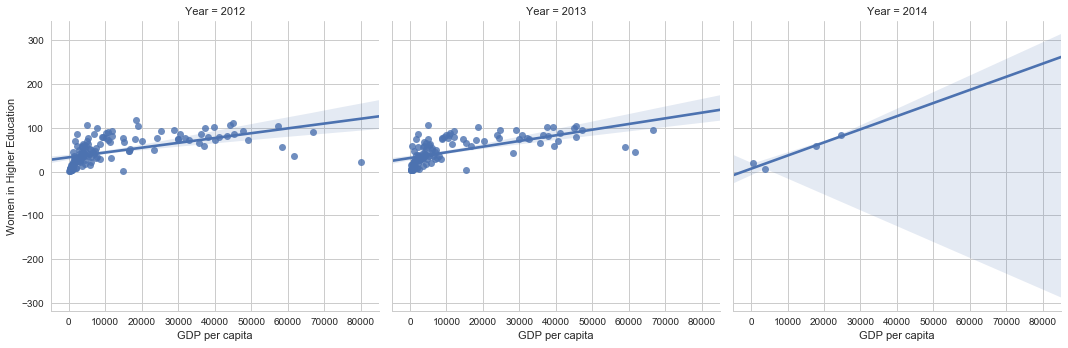

In [241]:
year_filter = data_poledu["Year"] >= 2012
sns.lmplot(x="GDP per capita", y="Women in Higher Education", col="Year", 
           data=data_poledu[year_filter]);

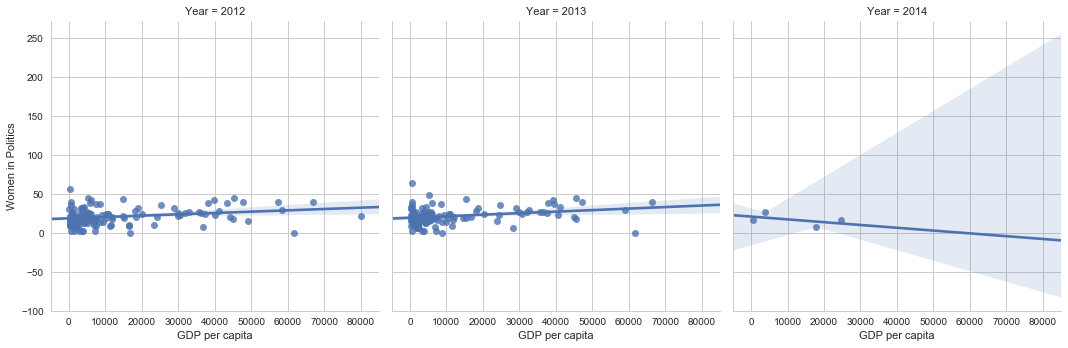

In [242]:
year_filter = data_poledu["Year"] >= 2012
sns.lmplot(x="GDP per capita", y="Women in Politics", col="Year", 
           data=data_poledu[year_filter]);

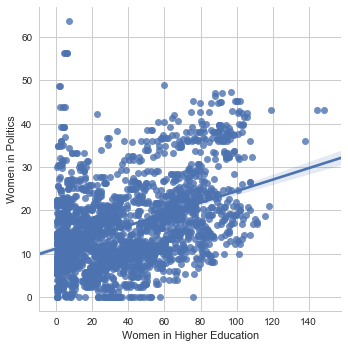

In [243]:
sns.lmplot(x="Women in Higher Education", y="Women in Politics", 
           data=data_poledu);

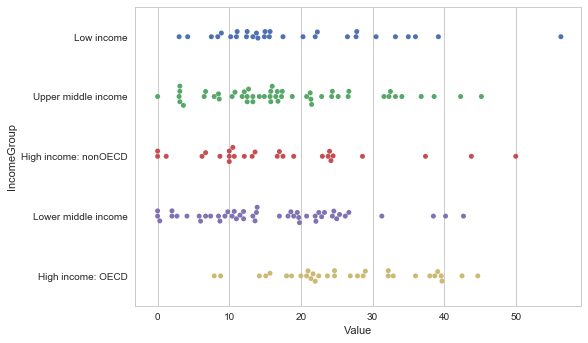

In [244]:
# Create a year filter
year_filter = full_data["Year"] == 2012

sns.swarmplot(x="Value", y="IncomeGroup", data=full_data[year_filter & filter_pol]);

In [245]:
order = ['High income: OECD','High income: nonOECD','Upper middle income','Lower middle income','Low income']

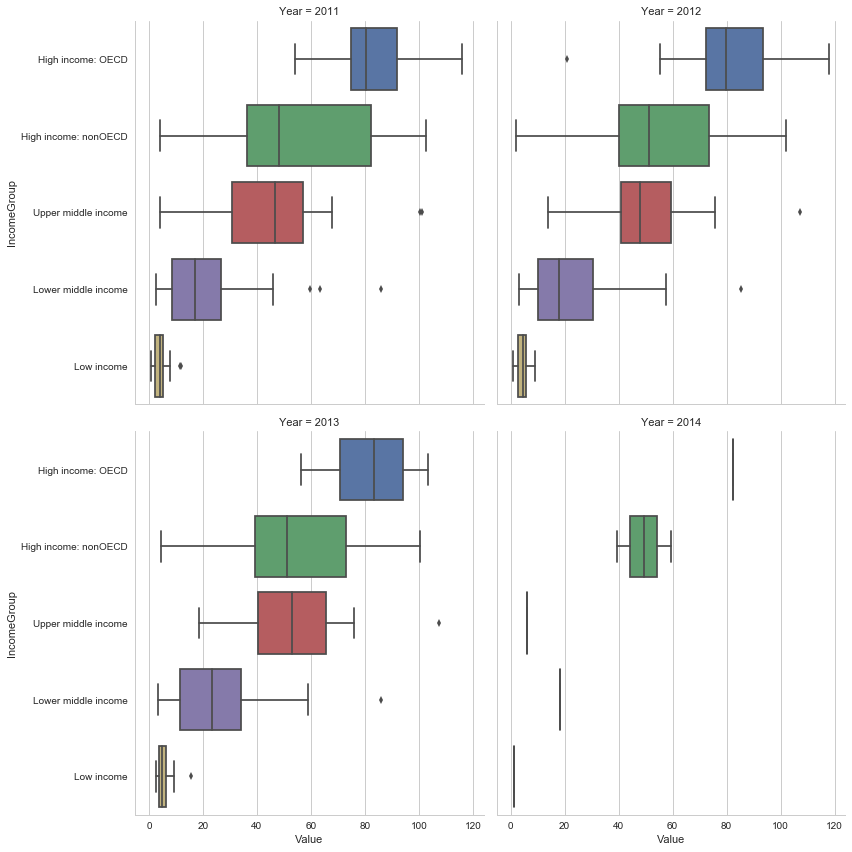

In [278]:
# Education and Income Group
year_filter = full_data["Year"] >= 2011

sns.factorplot(x="Value", y="IncomeGroup", data=full_data[filter_educ & year_filter], units=edu_fullname,
               col="Year", col_wrap=2, kind="box",
               order=order,
               size=6, aspect=1);

In [257]:
full_data[filter_gdp & year_filter].groupby(["IncomeGroup", "Year"]).describe()

Value                                           \
                          count          mean           std          min   
IncomeGroup          Year                                                  
High income: OECD    2011  32.0  34424.669353  17394.557601  9085.243094   
                     2012  32.0  34341.841488  17250.833430  9477.926860   
                     2013  32.0  34507.950626  17451.368534  9773.156353   
                     2014  31.0  35100.378301  17912.129883  9853.531277   
High income: nonOECD 2011  29.0  21543.318837  16348.388019  6179.257320   
                     2012  29.0  21649.476262  16026.367537  6433.632482   
                     2013  29.0  21818.688532  16158.843656  6429.204742   
                     2014  25.0  19718.699210  14098.790254  6088.027290   
Low income           2011  28.0    397.800039    135.870374   148.119097   
                     2012  27.0    416.866340    139.258213   148.983432   
                     2013  27.0    422.994768    149.679148   150.744896   
                     2014  26.0    432.442662    159.741110   152.652871   
Lower middle income  2011  49.0   1392.378051    694.217680   440.662538   
                     2012  49.0   1433.245671    700.166783   463.139828   
                     2013  49.0   1461.658723    696.373171   486.315605   
                     2014  47.0   1508.372090    704.623200   507.389499   
Upper middle income  2011  51.0   4630.334254   1687.275673  1468.278858   
                     2012  51.0   4786.511623   1748.949844  1620.237802   
                     2013  51.0   4878.257313   1742.245265  1776.746022   
                     2014  50.0   4956.969922   1814.945217  1882.379715   

                                                                     \
                                    25%           50%           75%   
IncomeGroup          Year                                             
High income: OECD    2011  19787.328494  36381.937532  44098.463634   
                     2012  18763.242943  37076.794470  43799.709588   
                     2013  18498.153946  37533.769815  43649.777028   
                     2014  18780.796747  37834.530583  44714.176664   
High income: nonOECD 2011  10830.556888  16238.676990  25504.337522   
                     2012  10626.075772  16439.702204  25555.128092   
                     2013  11013.101305  16748.135825  26401.603040   
                     2014  11004.324369  14456.261631  23640.818987   
Low income           2011    269.843593    394.368225    467.391175   
                     2012    293.858353    424.210404    482.692242   
                     2013    289.568083    426.513401    503.546252   
                     2014    293.713855    432.636095    512.701854   
Lower middle income  2011    871.526491   1088.311698   1944.082153   
                     2012    935.913384   1115.152143   1966.755778   
                     2013    963.963545   1164.342834   1986.092175   
                     2014    980.539776   1233.949344   2073.959633   
Upper middle income  2011   3443.289212   4245.412628   5798.681962   
                     2012   3530.593896   4534.345766   5928.626526   
                     2013   3645.750768   4620.055565   6054.527011   
                     2014   3822.263718   4665.897603   6141.417466   

                                         
                                    max  
IncomeGroup          Year                
High income: OECD    2011  82656.018690  
                     2012  80011.103089  
                     2013  81581.480187  
                     2014  82960.098918  
High income: nonOECD 2011  74483.142741  
                     2012  70626.253793  
                     2013  68637.690460  
                     2014  62168.772713  
Low income           2011    685.623878  
                     2012    722.045631  
                     2013    738.219070  
                     2014    766.383841  
Lower middle 

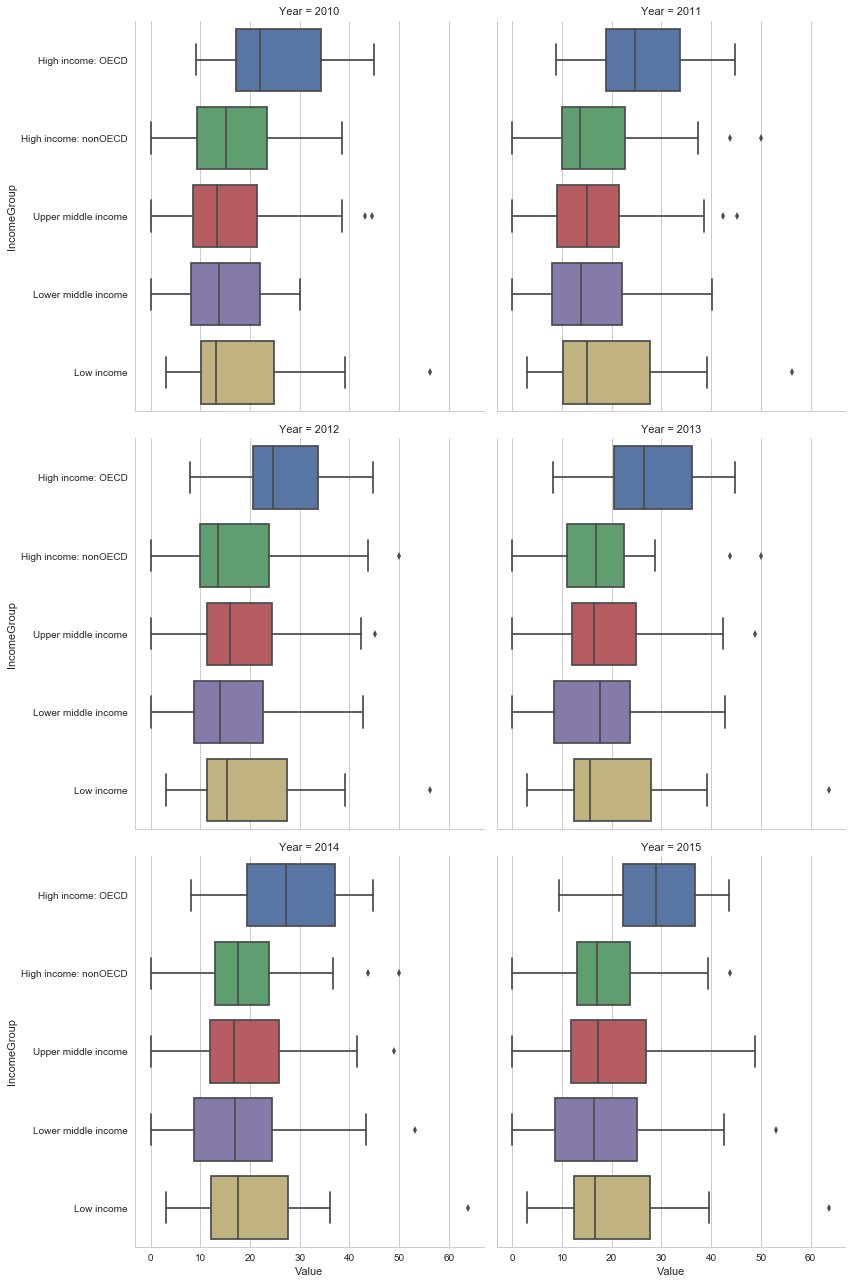

In [276]:
# Politics and Income Group
year_filter = full_data["Year"] >= 2010

sns.factorplot(x="Value", y="IncomeGroup", data=full_data[filter_pol & year_filter], units=pol_fullname,
               col="Year", col_wrap=2, kind="box",c
               order=order,
               size=6, aspect=1);

** Observations **

* General trend of undiscernable increase in participation -- there is an increase but very slight
* The correlation between nominal GDP per capita and % of seats is low, at 0.3
* Maximum participation is less than 50% of seats
* Except for High Income OECD countries the median hovers at around 15-20% -- Not even 1/4 of the seats are women
* High Income OECD countries have the highest representation in politics

** Recommendations ** 

* There are other indicators related to gender that are more correlated to GDP i.e., Education, Labor participation, etc.
* Inverse, correlate women seats to access to access to prenatal care or contraceptives or education
* Social involvement doesn't stop at being in office, can be extended to economics

In [249]:
full_data[filter_pol & year_filter].groupby(["IncomeGroup", "Year"]).describe()

Value                                             \
                          count       mean        std       min        25%   
IncomeGroup          Year                                                    
High income: OECD    2012  32.0  26.531250   9.799850  7.900000  20.600000   
                     2013  32.0  27.237500   9.884486  8.100000  20.475000   
                     2014  32.0  27.800000   9.920068  8.100000  19.450000   
                     2015  32.0  28.333163   9.518327  9.473684  22.250000   
High income: nonOECD 2012  27.0  17.125926  12.402562  0.000000  10.000000   
                     2013  26.0  17.626923  11.177784  0.000000  11.050000   
                     2014  27.0  18.600000  11.718624  0.000000  12.850000   
                     2015  27.0  18.358815  10.588362  0.000000  13.007519   
Low income           2012  30.0  19.526667  11.968664  3.000000  11.425000   
                     2013  29.0  20.744828  13.008997  3.000000  12.400000   
                     2014  29.0  20.220690  12.260954  3.000000  12.100000   
                     2015  29.0  20.326740  12.873376  3.030303  12.396694   
Lower middle income  2012  48.0  15.958333  10.372423  0.000000   8.650000   
                     2013  48.0  16.514583  10.572525  0.000000   8.375000   
                     2014  48.0  17.356250  11.905334  0.000000   8.650000   
                     2015  48.0  17.638958  12.126328  0.000000   8.649399   
Upper middle income  2012  51.0  18.060784  10.839780  0.000000  11.300000   
                     2013  51.0  18.817647  11.447335  0.000000  11.950000   
                     2014  51.0  18.980392  11.651798  0.000000  11.900000   
                     2015  51.0  19.674400  12.101845  0.000000  11.797101   

                                                            
                                 50%        75%        max  
IncomeGroup          Year                                   
High income: OECD    2012  24.700000  33.675000  44.700000  
                     2013  26.450000  36.125000  44.700000  
                     2014  27.250000  37.050000  44.700000  
                     2015  28.858974  36.833333  43.553009  
High income: nonOECD 2012  13.600000  23.900000  50.000000  
                     2013  16.850000  22.450000  50.000000  
                     2014  17.500000  23.900000  50.000000  
                     2015  16.969697  23.702128  43.750000  
Low income           2012  15.300000  27.400000  56.300000  
                     2013  15.700000  27.800000  63.800000  
                     2014  17.600000  27.700000  63.800000  
                     2015  16.666667  27.710843  63.750000  
Lower middle income  2012  13.850000  22.600000  42.700000  
                     2013  17.600000  23.575000  42.700000  
                     2014  16.900000  24.475000  53.100000  
                     2015  16.481013  25.000000  53.076923  
Upper middle income  2012  16.000000  24.350000  45.200000  
                     2013  16.500000  24.900000  48.900000  
                     2014  16.700000  25.850000  48.900000  
                     2015  17.283951  26.898559  48.856209

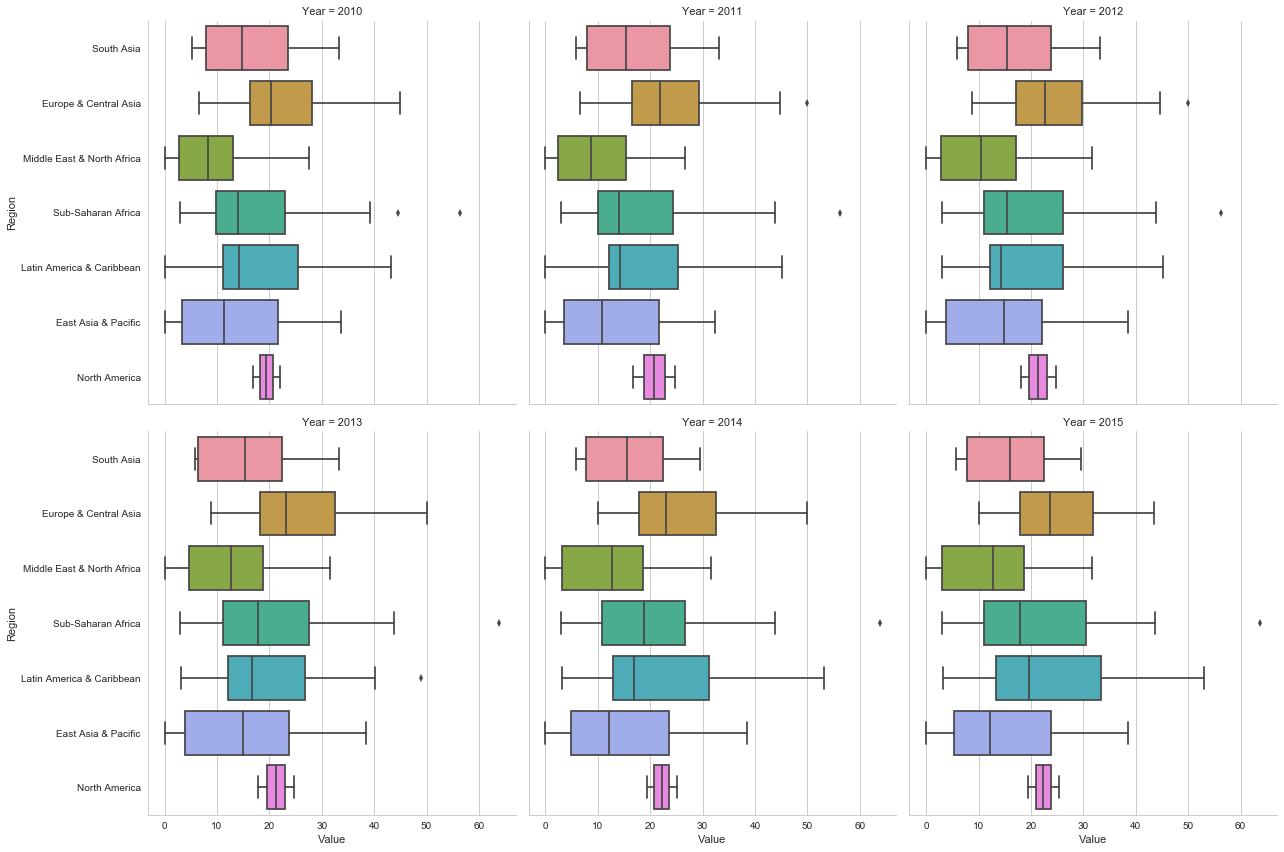

In [272]:
year_filter = full_data["Year"] >= 2010

sns.factorplot(x="Value", y="Region", data=full_data[filter_pol & year_filter], units=pol_fullname,
               col="Year", col_wrap=3, kind="box",
               size=6, aspect=1);

In [232]:
full_data[filter_pol & year_filter].groupby(["Region", "Year"]).describe()

Value                                   \
                                count       mean        std        min   
Region                     Year                                          
East Asia & Pacific        2012  27.0  13.674074  10.672704   0.000000   
                           2013  27.0  13.962963  10.952666   0.000000   
                           2014  28.0  13.489286  10.830900   0.000000   
                           2015  28.0  13.650859  10.917770   0.000000   
Europe & Central Asia      2012  52.0  24.371154   9.766215   8.800000   
                           2013  52.0  24.796154   9.929792   8.800000   
                           2014  52.0  25.190385  10.029647  10.100000   
                           2015  52.0  25.236327   9.530147  10.101010   
Latin America & Caribbean  2012  33.0  19.218182  11.314135   3.100000   
                           2013  32.0  19.818750  11.703830   3.100000   
                           2014  33.0  22.160606  12.828141   3.100000   
                           2015  32.0  23.208228  12.692047   3.125000   
Middle East & North Africa 2012  20.0  11.285000   9.616120   0.000000   
                           2013  19.0  13.263158   9.403735   0.000000   
                           2014  19.0  13.094737  10.129466   0.000000   
                           2015  19.0  13.176738  10.320178   0.000000   
North America              2012   2.0  21.350000   4.737615  18.000000   
                           2013   2.0  21.300000   4.808326  17.900000   
                           2014   2.0  22.200000   4.101219  19.300000   
                           2015   2.0  22.364243   4.192725  19.399538   
South Asia                 2012   8.0  16.862500  10.407818   5.800000   
                           2013   8.0  16.375000  10.548087   5.800000   
                           2014   8.0  16.162500   9.553748   5.800000   
                           2015   8.0  16.268054   9.545644   5.777778   
Sub-Saharan Africa         2012  46.0  19.789130  11.995892   3.000000   
                           2013  46.0  20.819565  12.665818   3.000000   
                           2014  45.0  20.842222  12.428459   3.000000   
                           2015  46.0  21.293082  13.152190   3.030303   

                                                                             
                                       25%        50%        75%        max  
Region                     Year                                              
East Asia & Pacific        2012   3.850000  14.900000  22.100000  38.500000  
                           2013   3.850000  14.900000  23.800000  38.500000  
                           2014   4.950000  12.200000  23.625000  38.500000  
                           2015   5.326104  12.180180  23.791431  38.461538  
Europe & Central Asia      2012  17.175000  22.700000  29.800000  50.000000  
                           2013  18.200000  23.150000  32.450000  50.000000  
                           2014  17.950000  22.950000  32.475000  50.000000  
                           2015  17.820988  23.583316  31.811594  43.553009  
Latin America & Caribbean  2012  12.100000  14.200000  26.200000  45.200000  
                           2013  12.100000  16.700000  26.800000  48.900000  
                           2014  13.000000  17.000000  31.300000  53.100000  
                           2015  13.322785  19.588882  33.333333  53.076923  
Middle East & North Africa 2012   2.825000  10.400000  17.125000  31.600000  
                           2013   4.650000  12.700000  18.700000  31.600000  
                           2014   3.100000  12.700000  18.700000  31.600000  
                           2015   3.114224  12.727273  18.683775  31.601732  
North America              2012  19.675000  21.350000  23.025000  24.700000  
                           2013  19.600000  21.300000  23.000000  24.700000  
                           2014  20.750000  22.200000  23.650000  25.100000  
                     

### Historical US data

In [ ]:
# Filter out the US data
us_poldata = polcat_data[polcat_data['CountryName'] == 'United States']
us_poldata.describe()

In [ ]:
# Plot the data
plt.scatter(us_poldata['Year'].values, us_poldata['Value'].values)

# Label the axes
plt.xlabel('Year')
#plt.ylabel()

#label the figure
plt.title(us_poldata['IndicatorName'].iloc[0])

# to make more honest, start they y axis at 0
plt.axis([1989, 2016, 0, 25])

plt.show()